# **BANK CUSTOMER CHURN**

**IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

**EXPLORATORY DATA ANALYSIS**

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
pd.isnull(df).sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['CustomerId'].duplicated().sum()

np.int64(0)

In [8]:
numerical_cols=['Balance', 'EstimatedSalary', 'CreditScore']
df[numerical_cols].describe()

,Balance,EstimatedSalary,CreditScore
count,10000.000000,10000.000000,10000.000000
mean,76485.889288,100090.239881,650.528800
std,62397.405202,57510.492818,96.653299
min,0.000000,11.580000,350.000000
25%,0.000000,51002.110000,584.000000
50%,97198.540000,100193.915000,652.000000
75%,127644.240000,149388.247500,718.000000
max,250898.090000,199992.480000,850.000000


In [9]:
df.drop(['RowNumber'], axis=1, inplace=True)
df.drop(['Surname'], axis=1, inplace=True)

Removing the columns which are not required.

In [10]:
def conv(value):
    if value==1:
        return 'Yes'
    else:
        return 'No'

df['HasCrCard']=df['HasCrCard'].apply(conv)
df['IsActiveMember']=df['IsActiveMember'].apply(conv)
df['Exited']=df['Exited'].apply(conv)

Replacing the values of 1 and 0 with 'Yes' and 'No' in the required columns.

In [11]:
df.rename(columns={'Exited':'Churn'}, inplace=True)

Renaming the column named 'Exited' with 'Churn'.

**DATA VISUALISATION**

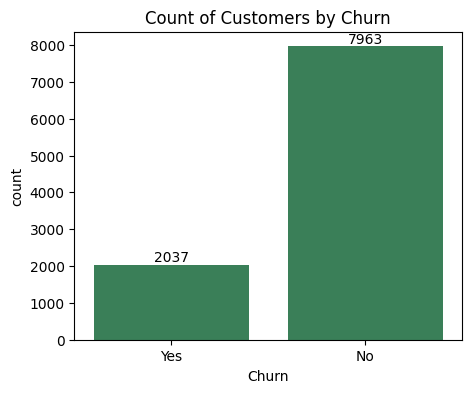

In [12]:
plt.figure(figsize=(5,4))
exit=sns.countplot(x='Churn',data=df, color='seagreen')

for bars in exit.containers:
    exit.bar_label(bars)
    
plt.title("Count of Customers by Churn")
plt.show()

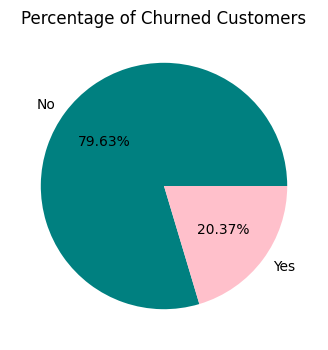

In [13]:
plt.figure(figsize=(5,4))
gb=df.groupby('Churn').agg({'Churn':'count'})
colors = ['teal', 'pink']
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%', colors=colors)
plt.title("Percentage of Churned Customers")
plt.show()

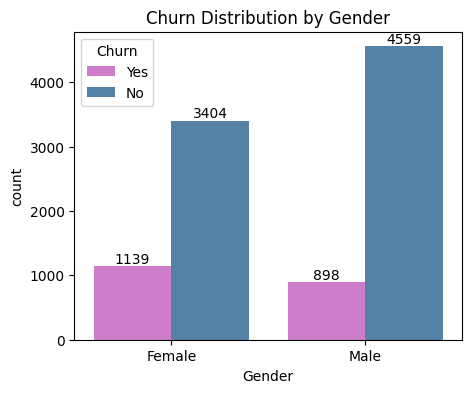

In [14]:
plt.figure(figsize=(5,4))
palette_dict = {"No": "steelblue", "Yes": "orchid"}
gender=sns.countplot(x='Gender', data=df, hue='Churn', palette=palette_dict)

for bars in gender.containers:
    gender.bar_label(bars)
    
plt.title("Churn Distribution by Gender")
plt.show()

This gives insight that Churned Customers are more FEMALES.

<Figure size 500x400 with 0 Axes>

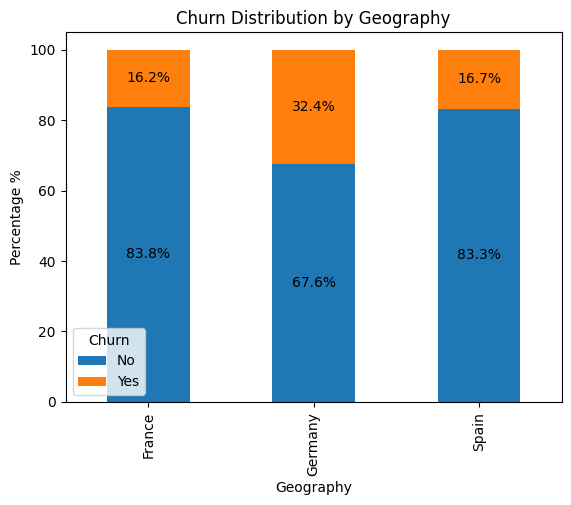

In [15]:
plt.figure(figsize=(5,4))
count_df = df.groupby(['Geography', 'Churn']).size().reset_index(name='Count')
pivot_df = count_df.pivot(index='Geography', columns='Churn', values='Count')
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
ax = percent_df.plot(kind='bar', stacked=True)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text( bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
        f'{height:.1f}%', ha='center', va='center')

plt.title('Churn Distribution by Geography')
plt.ylabel('Percentage %')
plt.show()

This gives insight that Churned Customers are more from GERMANY.

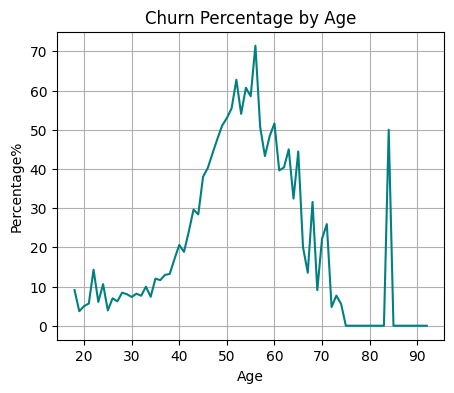

In [16]:
plt.figure(figsize=(5,4))
age_churn = df.groupby('Age')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

age_churn['Yes'].plot(kind='line', color='teal')
plt.title('Churn Percentage by Age')
plt.ylabel("Percentage%")
plt.grid(True)
plt.show()

#This gives insight that Churned Customers are majorly Aged between 50 and 60.

Text(0.5, 1.0, 'Churn Distribution by Number of Products')

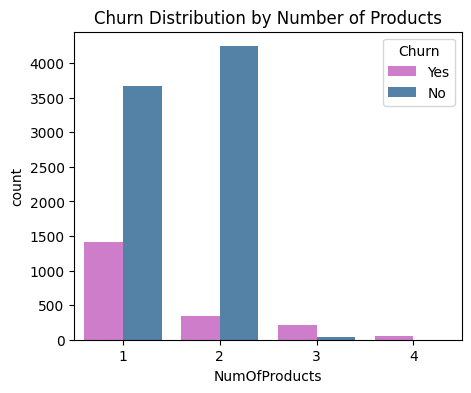

In [17]:
plt.figure(figsize=(5,4))
palette_dict = {"No": "steelblue", "Yes": "orchid"}
sns.countplot(x='NumOfProducts', data=df, hue='Churn', palette=palette_dict)
plt.title("Churn Distribution by Number of Products")

This gives insight that Customers with 1 Product are most likely to be Churned and Customers with 2 Products are mostly likely to be Retained while 
the Customers with 3 or 4 Number of Products are at high risk of getting Churned or are highly dissatisfied with the Products.

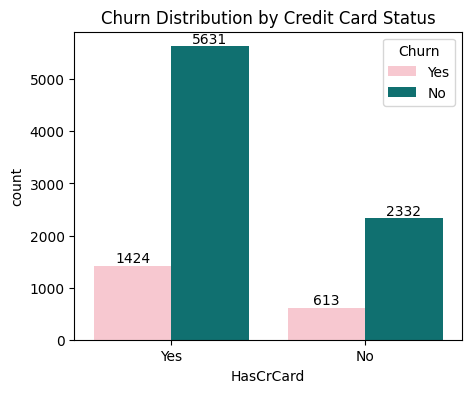

In [18]:
plt.figure(figsize=(5,4))
palette_dict = {"No": "teal", "Yes": "pink"}
card=sns.countplot(x=df['HasCrCard'], hue='Churn', data=df, palette=palette_dict)
for bars in card.containers:
    card.bar_label(bars)
plt.title("Churn Distribution by Credit Card Status")
plt.show()

This gives insight that Churned Customers mostly had Credit Card.

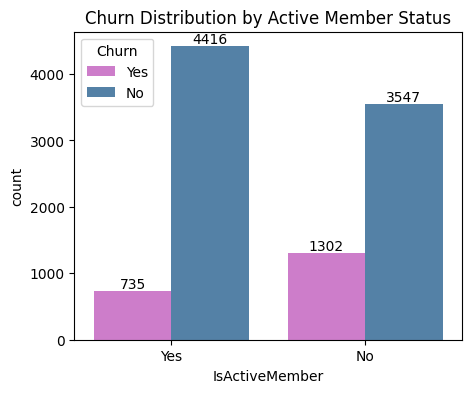

In [19]:
plt.figure(figsize=(5,4))
palette_dict = {"No": "steelblue", "Yes": "orchid"}
active=sns.countplot(x='IsActiveMember', data=df, hue='Churn', palette=palette_dict)
for bars in active.containers:
    active.bar_label(bars)
plt.title("Churn Distribution by Active Member Status")
plt.show()

This gives insight that most of the Churned Customers were NOT ACTIVE.

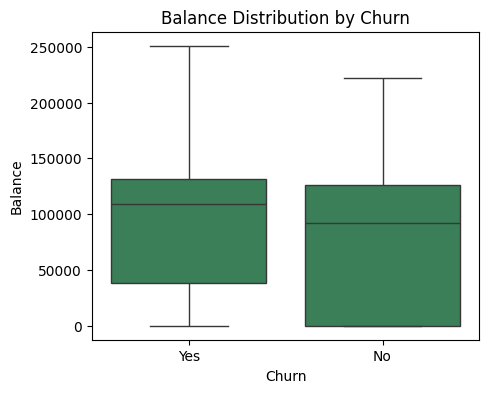

In [20]:
plt.figure(figsize=(5,4))
palette_dict = {"No": "teal", "Yes": "pink"}
Exit_numeric = df['Balance'], df['EstimatedSalary']
sns.boxplot(y='Balance', x='Churn', data=df, color='seagreen')
plt.title("Balance Distribution by Churn")
plt.show()

This gives insight that Churned Customers were High-Balance Customers which means that they were highly valuable to the business.

In [21]:
exited=df[(df.Churn=='No')].index
Exit=df.drop(exited)

Removing the Customers that are Retained.

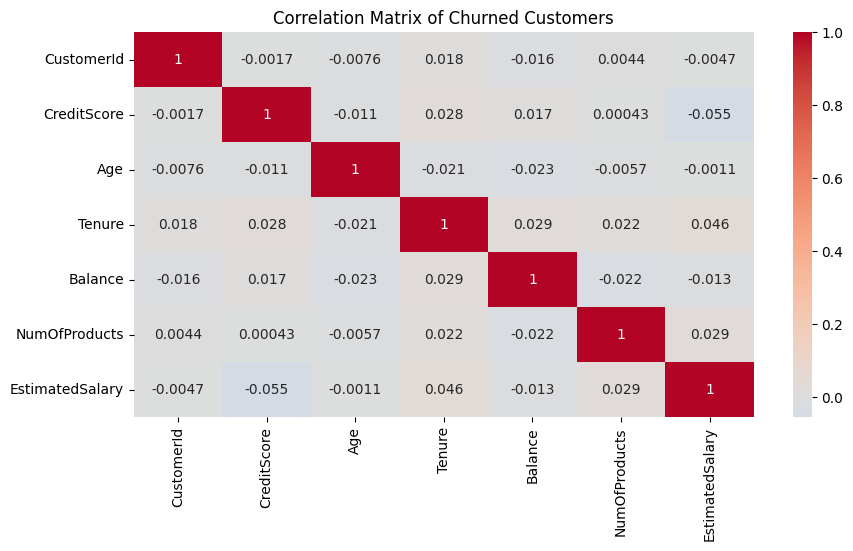

In [22]:
corr = Exit.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Churned Customers")
plt.show()

No strong Correlations are derived in Churned Customers.

In [23]:
retain=df[(df.Churn=='Yes')].index
Retain=df.drop(retain)

Removing the Customers that are Churned.

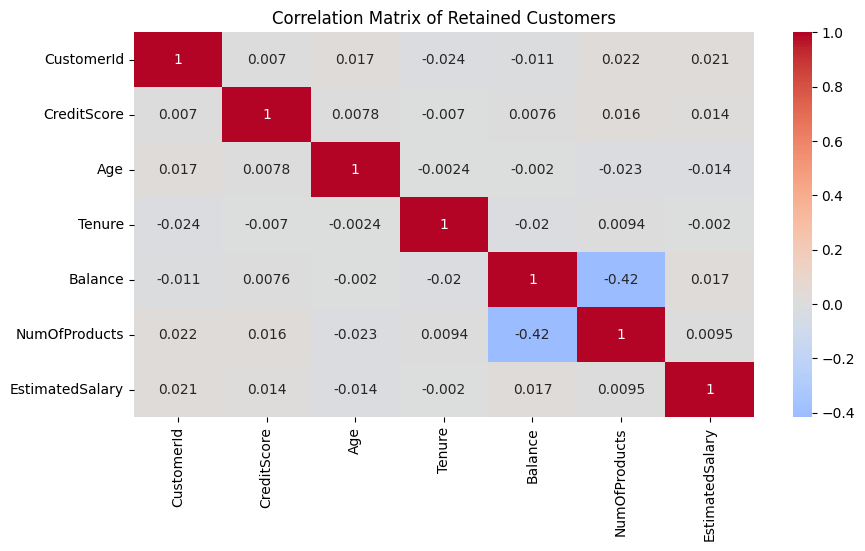

In [24]:
corr = Retain.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Retained Customers")
plt.show()

Retained Customers have a Strong Negative Correlation in Balance versus Number of Products which gives insight that they may have utilized their Balance for Product Engagement and hence they are more Active.

**CONCLUSION**

The analysis of the Bank Customer Churn dataset provided several valuable insights into customer behavior and the factors associated with churn:

>Customer Activity Matters:
Active members were significantly less likely to churn compared to inactive members. This suggests that engagement and usage of banking services may contribute to customer retention.

>Credit Card Ownership Is Not a Strong Indicator:
Customer held a credit card had a slight effect on their likelihood of churn, indicating that this feature may not be a reliable predictor of customer behavior.

>Gender Distribution Shows Minor Variation:
Female customers were observed to churn at slightly higher rates, but the gender does not play a major role in churn behavior.

>Other Indicators:
Analysis of numerical variables such as balance, tenure, and estimated salary, along with geographic trends, provide a stronger foundation for predictive modeling.

>Business Implication:
Retention efforts may be more effective when targeted at inactive customers and potentially high-value clients who show early signs of disengagement.